In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [5]:
raw_data=pd.read_csv('Data/train.csv')
raw_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [6]:
raw_data.describe(include='all')

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82657.000000,77088.000000,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,NaN,NaN,358,1019,17,13786,28
top,@vossroger,US,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,"This is a robust, full-bodied Zinfandel. It's ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,NaN,NaN,25736,3334,7503,175,10587
mean,NaN,NaN,NaN,NaN,NaN,88.544564,36.922232,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.099649,43.698346,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,88.000000,27.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

In [8]:
# removing Duplicates

In [9]:
raw_data[raw_data.duplicated('review_description',keep=False)].sort_values('review_description').head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
53655,@wawinereport,US,Roza Ridge 2010 Malbec (Rattlesnake Hills),"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Roza Ridge,Malbec
73628,@wawinereport,US,Roza Ridge 2010 Malbec (Rattlesnake Hills),"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Roza Ridge,Malbec
64962,@wawinereport,US,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Ross Andrew,Rosé
81272,@wawinereport,US,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Ross Andrew,Rosé
45297,@vossroger,France,Château Haut-Sarpe 2008 Barrel sample (Saint-...,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Château Haut-Sarpe,Bordeaux-style Red Blend


In [10]:
data = raw_data.drop_duplicates('review_description')
data = raw_data[pd.notnull(raw_data.price)]
data.shape

(77088, 12)

# Exploratory Analysis

Pearson Correlation: (0.41154965296432944, 0.0)
                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.430
Method:                 Least Squares   F-statistic:                          5.824e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):                        0.00
Time:                        11:23:09   Log-Likelihood:                     -4.3334e+05
No. Observations:               77088   AIC:                                  8.667e+05
Df Residuals:                   77087   BIC:                                  8.667e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      

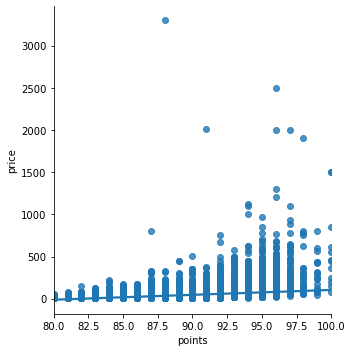

In [13]:
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(data.price, data.points))
print(sm.OLS(data.points, data.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=data)

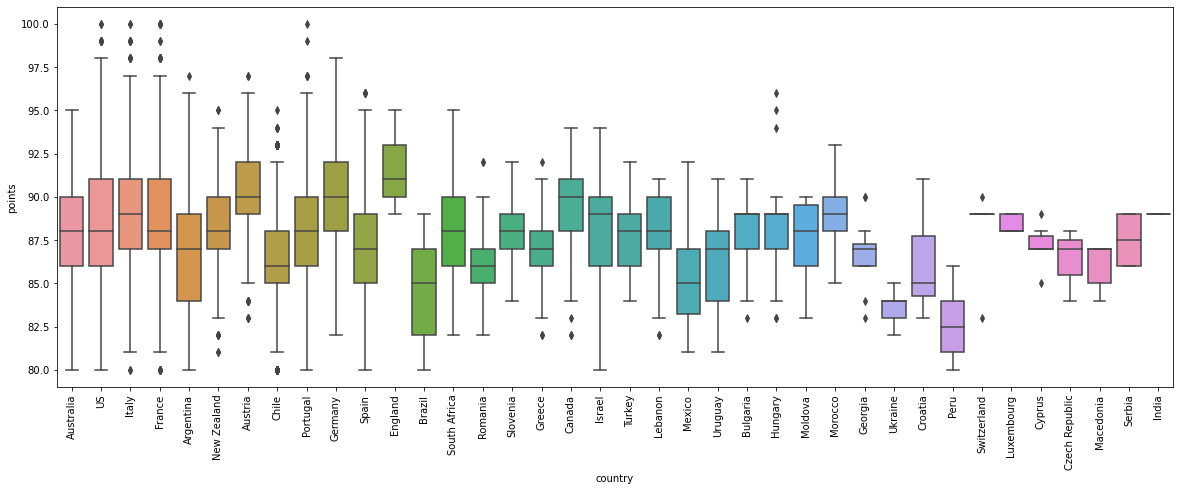

In [14]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=data, ax = ax)
plt.xticks(rotation = 90)
plt.show()


In [15]:
data.country.value_counts()[:17]

US              38406
France          12700
Italy            7919
Chile            2858
Portugal         2814
Spain            2711
Argentina        2537
Austria          1593
Germany          1548
New Zealand      1090
Australia        1006
South Africa      670
Israel            309
Canada            173
Greece            137
Bulgaria           93
Romania            80
Name: country, dtype: int64

In [16]:
# removing less than 100 observations

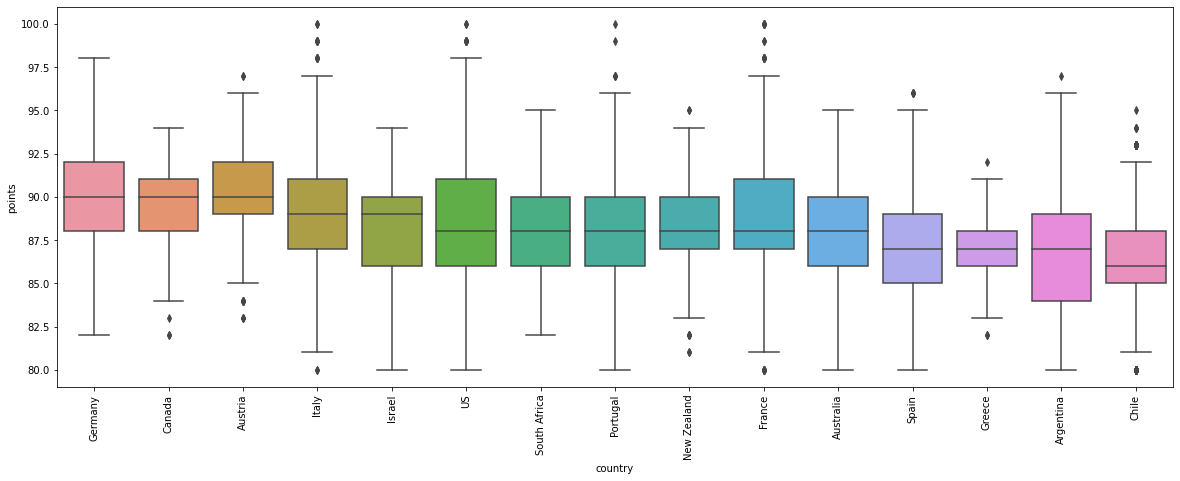

In [17]:
country=data.groupby('country').filter(lambda x: len(x) >100)
df2 = pd.DataFrame({col:vals['points'] for col,vals in country.groupby('country')})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='points', data=country, order=meds.index, ax = ax)
plt.xticks(rotation = 90)

plt.show()

In [18]:
# wine price sorted with respect to median

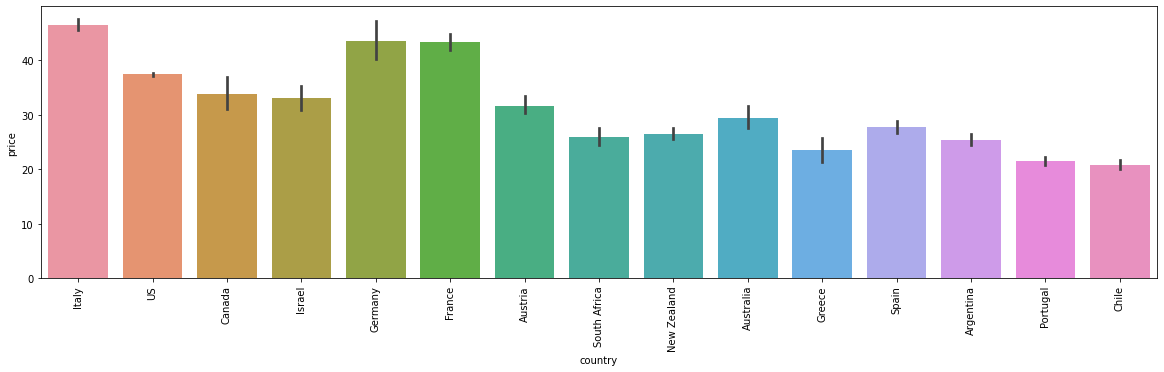

In [19]:
df3 = pd.DataFrame({col:vals['price'] for col,vals in country.groupby('country')})
meds2 = df3.median()
meds2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (20,5))
chart = sns.barplot(x='country',y='price', data=country, order=meds2.index, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [20]:
# medians for the above barplot
print(meds2)

Italy           35.0
US              30.0
Canada          30.0
Israel          27.0
Germany         27.0
France          25.0
Austria         25.0
South Africa    20.0
New Zealand     20.0
Australia       20.0
Greece          19.0
Spain           18.0
Argentina       17.0
Portugal        15.0
Chile           15.0
dtype: float64


In [21]:
# wine varieties with respect to count

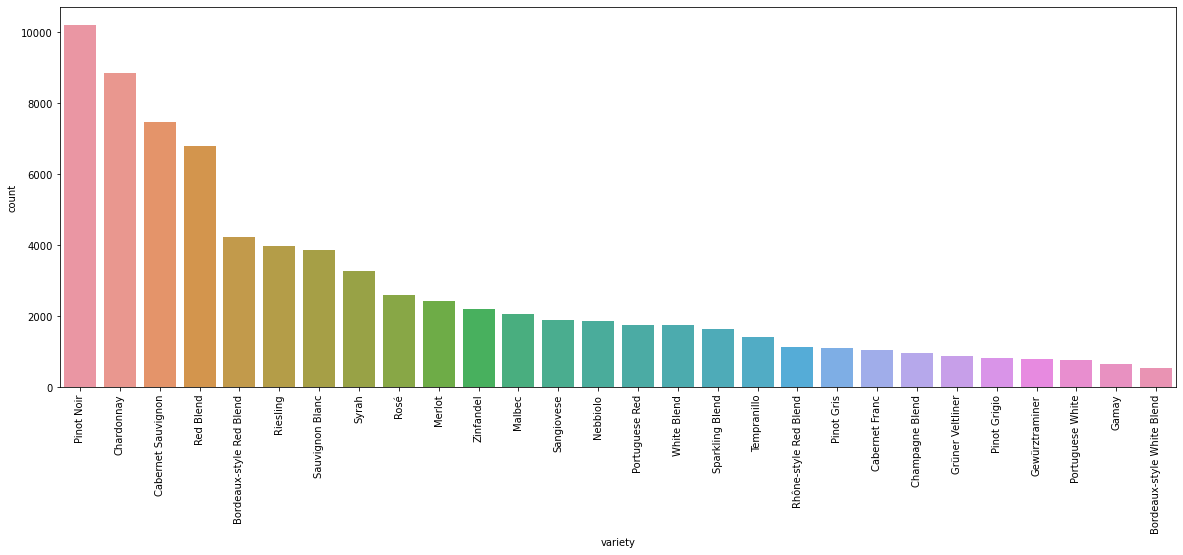

In [22]:
data = data.groupby('variety').filter(lambda x: len(x) >100)
list = data.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=data, order = list, ax=ax4)
plt.xticks(rotation = 90)
plt.show()

In [23]:
# wine varieties with respect to ponints

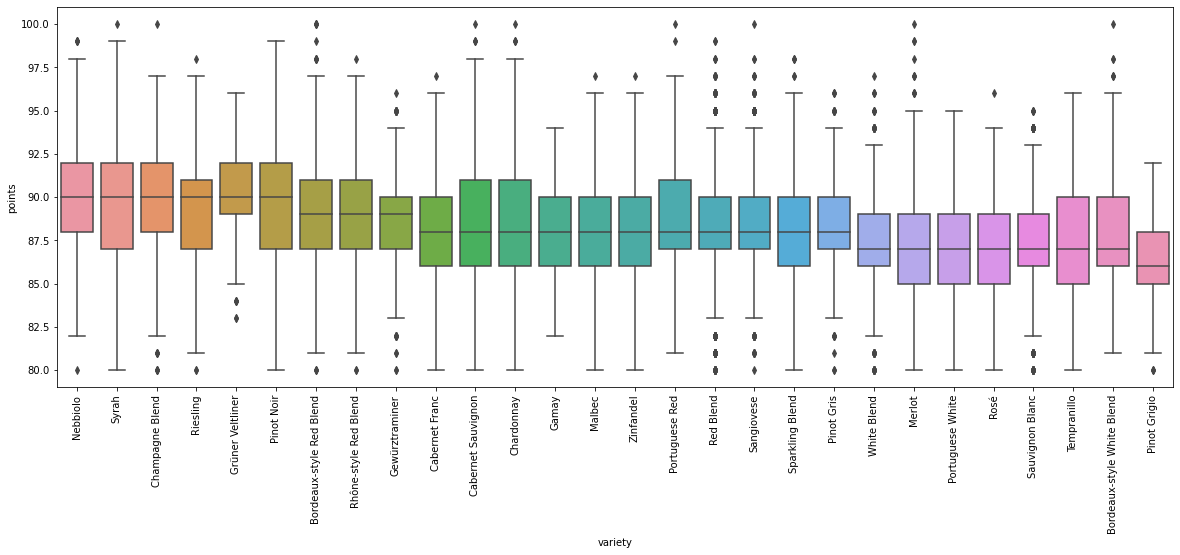

In [24]:
data = data.groupby('variety').filter(lambda x: len(x) >200)

df4 = pd.DataFrame({col:vals['points'] for col,vals in data.groupby('variety')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='variety',y='points', data=data, order=meds3.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()


In [25]:
# wine varieties with repect to price

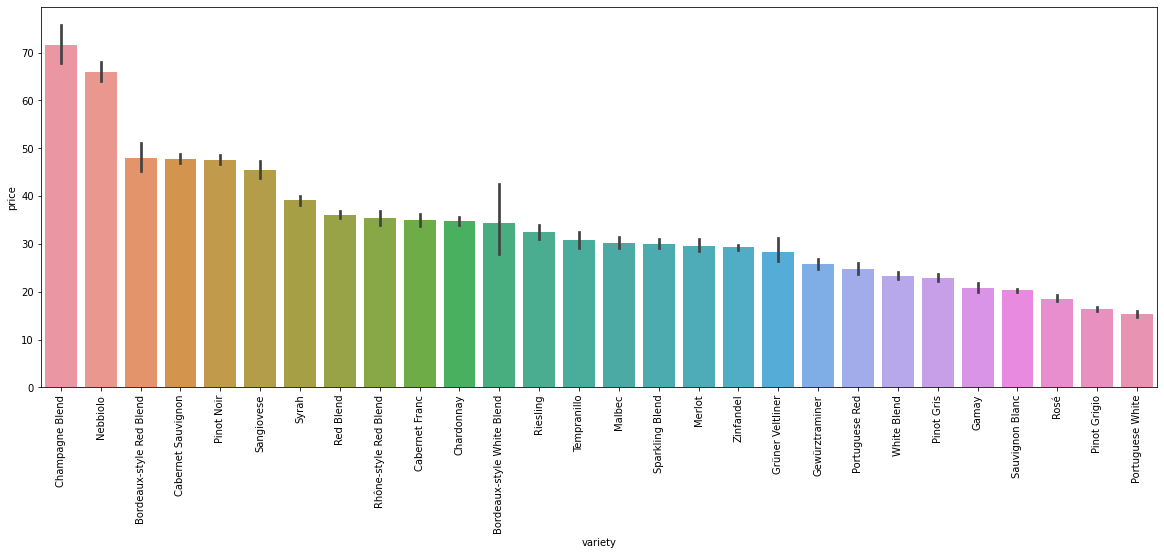

In [26]:
df6 = pd.DataFrame({col:vals['price'] for col,vals in data.groupby('variety')})
mean2 = df6.mean()
mean2.sort_values(ascending=False, inplace=True)

fig3, ax3 = plt.subplots(figsize = (20,7))
chart = sns.barplot(x='variety',y='price', data=data, order=mean2.index, ax = ax3)
plt.xticks(rotation = 90)
plt.show()


# Modelling- Logistic Regression

In [27]:
data.country.value_counts().sort_values(ascending=False).head(15)

US              38406
France          12700
Italy            7919
Chile            2858
Portugal         2814
Spain            2711
Argentina        2537
Austria          1593
Germany          1548
New Zealand      1090
Australia        1006
South Africa      670
Israel            309
Canada            173
Greece            137
Name: country, dtype: int64

In [28]:
top_10=[x for x in data.country.value_counts().sort_values(ascending=False).head(10).index]
top_10

['US',
 'France',
 'Italy',
 'Chile',
 'Portugal',
 'Spain',
 'Argentina',
 'Austria',
 'Germany',
 'New Zealand']

In [29]:
data_test=pd.read_csv('Data/test.csv')

In [40]:
X = data.drop(['user_name','review_title','country','designation','province','region_1','region_2','variety','winery'], axis = 1)
y = data.variety
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(57816, 3) (19272, 3) (57816,) (19272,)


In [41]:
wine =data.variety.unique().tolist()
wine.sort()
wine[:10]

['Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Cabernet Franc',
 'Cabernet Sauvignon',
 'Champagne Blend',
 'Chardonnay',
 'Gamay',
 'Gewürztraminer',
 'Grüner Veltliner',
 'Malbec']

In [42]:
output = set()
for x in data.variety:
    x = x.lower()
    x = x.split()
    for y in x:
        output.add(y)

variety_list =sorted(output)
variety_list[:10]

['blanc',
 'blend',
 'bordeaux-style',
 'cabernet',
 'champagne',
 'chardonnay',
 'franc',
 'gamay',
 'gewürztraminer',
 'grigio']

In [43]:
extras = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'cab',"%"]
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update(variety_list)
stop.update(extras)

In [44]:
from scipy.sparse import hstack

vect = CountVectorizer(stop_words = stop)
X_train_dtm = vect.fit_transform(X_train.review_description)
price = X_train.price.values[:,None]
X_train_dtm = hstack((X_train_dtm, price))
X_train_dtm

C:\Users\hp\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bordeaux', 'rhône', 'style'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<57816x22596 sparse matrix of type '<class 'numpy.float64'>'
	with 1444322 stored elements in COOrdinate format>

In [46]:
X_test_dtm = vect.transform(X_test.review_description)
price_test = X_test.price.values[:,None]
X_test_dtm = hstack((X_test_dtm, price_test))
X_test_dtm

<19272x22596 sparse matrix of type '<class 'numpy.float64'>'
	with 479120 stored elements in COOrdinate format>

In [47]:
from sklearn.linear_model import LogisticRegression
models = {}
for z in wine:
    model = LogisticRegression()
    y = y_train == z
    model.fit(X_train_dtm, y)
    models[z] = model

testing_probs = pd.DataFrame(columns = wine)

C:\Users\hp\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

C:\Users\hp\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [48]:
for variety in wine:
    testing_probs[variety] = models[variety].predict_proba(X_test_dtm)[:,1]
    
predicted_wine = testing_probs.idxmax(axis=1)

comparison = pd.DataFrame({'actual':y_test.values, 'predicted':predicted_wine.values})   

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted)*100,"%")
comparison.head(5)

Accuracy Score: 61.03154836031548 %


,actual,predicted
0,Syrah,Cabernet Sauvignon
1,Portuguese White,Chardonnay
2,Chardonnay,Chardonnay
3,Sparkling Blend,White Blend
4,Pinot Noir,Pinot Noir
